## Import the Pickle

In [11]:
import pickle
from langdetect import detect
import re
import string
from project_functions import *
import pandas as pd

In [3]:
!ls /home/jovyan/work/2_Semester

'API Tweeter.ipynb'  'PLaying with tutorials.ipynb'   tweets_jan2019
 backup		      Text_Mining_MASTER
 featuresets.pickle   tweets_df.csv


In [4]:
pickle_tweets = open("/home/jovyan/work/2_Semester/tweets_jan2019", "rb")
example_tweets = pickle.load(pickle_tweets)
example_tweets = example_tweets[["datetime","text"]]
example_tweets.head()

,datetime,text
0,2019-01-01 00:00:00,"@ #1, Bitcoin with unit price of $3,742.7, m..."
1,2019-01-01 00:00:00,Learn it. 2018 Sees Bitcoin ’s Lowest Average...
2,2019-01-01 00:00:01,"仮想通貨の時価総額 $125,622,003,150 BTC 価格:$3734.04..."
3,2019-01-01 00:00:01,IAM Platform Curated Retweet: Via: https:// ...
4,2019-01-01 00:00:01,"Bitcoin - BTC Price: $3,742.70 Change in 1h: ..."


### Take a sample

In [5]:
example_tweets = example_tweets.head(1000)

In [20]:
all_data = pd.DataFrame.from_dict(all_data)

In [7]:
def filter_english(dataframe):
    blanco = "blanco"
    text_column = dataframe["text"]
    
    # Create a list saving all the languages of the tweets
    language_list =[]

    for i in text_column:

        try:
            language = detect(i)
            language_list.append(language)
        except:
            language_list.append(blanco)    
    
    dataframe["Language"] = language_list
    
    return dataframe.loc[dataframe['Language'] == "en"]


In [21]:
filter_english(all_data)

,created_at,text,lang,Language
0,Tue Apr 09 14:59:27 +0000 2019,@suprraz I’ve often felt that Bitcoin is more ...,en,en


In [165]:
example_tweets = filter_english(example_tweets)

In [22]:
def removal_function(dataframe):
    new_text = []
    text_column = dataframe["text"]
    for i in text_column:
        y = i

        y = re.sub(r"@[A-Z-a-z-0-9_.]+","", y) #remove users with@
        y = y.replace("\n"," ") # remove enters
        y= re.sub(r"http\S+","",y) # removes links
        y= re.sub("\s+"," ",y)  #removes more one spaces
        y= re.sub(r"&(amp;)", "&", y) # removes and in html format
        y = re.sub(r"[0-9]","",y) #remove numbers
        y=re.sub(r"(.+?)\1+",r"\1",y) #remove repeted letters
        y= re.sub("\s+"," ",y) #remove more one space

        i = y
        new_text.append(i)
        
    dataframe["text"] = new_text
    return dataframe

In [23]:
removal_function(all_data)

,created_at,text,lang,Language
0,Tue Apr 09 14:59:27 +0000 2019,I’ve often felt that Bitcoin is more analogou...,en,en


In [167]:
example_tweets = removal_function(example_tweets)

In [168]:
example_tweets.head()

,datetime,text,Language
0,2019-01-01 00:00:00,"@ #, Bitcoin with unit price of $,., market ca...",en
1,2019-01-01 00:00:00,Learn it. Ses Bitcoin ’s Lowest Average Daily ...,en
3,2019-01-01 00:00:01,IAM Platform Curated Retwet: Via: twiter.com/_...,en
4,2019-01-01 00:00:01,"Bitcoin - BTC Price: $,. Change in h: +.% Mark...",en
5,2019-01-01 00:00:01,IAM Platform Curated Retwet: Via: twiter.com/R...,en


### Dataframe to Dictionary

In [30]:
# create a dictionary out of the dataframe with two values -> datetime and text
tweet_dict = example_tweets.T.to_dict("list")
#tweet_dict

### Detect Language

In [31]:
from langdetect import detect 
blanco = "blanco"

# Create a list saving all the languages of the tweets
language_list =[]
for i in tweet_dict:
    try:
        language = detect(tweet_dict[i][1])
        language_list.append(language)
    except:
        language_list.append(blanco)        

In [32]:
print(set(language_list))

{'pt', 'nl', 'ja', 'cs', 'en'}


In [33]:
example_tweets["Language"] = language_list

In [34]:
# Cut out all tweets which are not english
example_tweets = example_tweets.loc[example_tweets['Language'] == "en"]

In [35]:
tweet_dict = example_tweets.T.to_dict("list")

In [36]:
print(tweet_dict[0][1])

@ #1,  Bitcoin  with unit price of $3,742.7, market cap of $65,331,499,158 (52.01%), and 24 hr vol. of $4,661,840,806.32 (33.00%)


### Preprocessing Tweets 

In [37]:
import re
import string
for i in tweet_dict:
    y = tweet_dict[i][1]
    y = re.sub(r"@[A-Z-a-z-0-9_.]+","", y) #remove users with@
    #y=remove_emoji(y) #remove emojis
    #y = re.sub("(\:\)+|\=\)+|\:D+|(\:\(+|\=\(+|\:-\(+))"," ",y) #remove smiles not in unicode format
    y = y.replace("\n"," ") # remove enters
    y= re.sub(r"http\S+","",y) # removes links
    y= re.sub("\s+"," ",y)  #removes more one spaces
    y= re.sub(r"&(amp;)", "&", y) # removes and in html format
    #y = re.sub(r"[^\w\s]","",y) #remove special characters diferents languages, dot, questions marks, etc
    #y = re.sub(r"[^a-zA-Z\d\s:]","",y)
    y = re.sub(r"[0-9]","",y) #remove numbers
    y=re.sub(r"(.+?)\1+",r"\1",y) #remove repeted letters
    y= re.sub("\s+"," ",y) #remove more one space
    
    tweet_dict[i][1] = y   # overwrite the dictionary

In [38]:
tweet_dict

{0: ['2019-01-01 00:00:00',
  '@ #, Bitcoin with unit price of $,., market cap of $, (.%), and hr vol. of $,. (.%)',
  'en'],
 1: ['2019-01-01 00:00:00',
  'Learn it. Ses Bitcoin ’s Lowest Average Daily Price Change: Report cointelegraph.com/news/-ses -bitcoins-lowest-average-daily-price-change-report … via #tech #digital #data #busines',
  'en'],
 3: ['2019-01-01 00:00:01',
  "IAM Platform Curated Retwet: Via: twiter.com/_alterdice Markets Se Piecemeal Price Action, Some Stability After Yesterday's Plumet cointelegraph.com/news/markets-s e-piecemeal-price-action-some-stability-after-yesterdays-plumet … #btc #cryptocurency #bitcoin #blockchain #IAMPlatform #TopInfluence #BlockChainNews",
  'en'],
 4: ['2019-01-01 00:00:01',
  'Bitcoin - BTC Price: $,. Change in h: +.% Market cap: $,. Ranking: #Bitcoin #BTC',
  'en'],
 5: ['2019-01-01 00:00:01',
  'IAM Platform Curated Retwet: Via: twiter.com/RealBitShoping Cypherpunk Jameson Lop loks to Bitcoin as the “first step” towards replacing gov

In [12]:
import copy 
untoken_tweet_dict = copy.deepcopy(tweet_dict)

In [ ]:
# import necessary libraries
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# function for tokenizing a dictionary with the string as the value (dict{"asd":"THIS IS TOKENIZED"})
def tokenize_tw(dct):
    for i in dct:
        j = dct[i][1].lower()
        token_norm = RegexpTokenizer(r'\w+').tokenize(j)
        dct[i][1] = token_norm
    return dct


#function for removing stopwords from a dictionary with the string as the value (dict{"asd":"THIS IS TOKENIZED"})
def remove_stopwords(dct,language):
    for j in dct:
        T = dct[j][1]
        stop_words = set(stopwords.words(language))
        norm_tokens = [i for i in T if not i in stop_words]
        dct[j][1] = norm_tokens
    return dct

#function for lemmatizing  a dictionary with the string as the value (dict{"asd":"THIS IS TOKENIZED"})
def lemmatize(dct):
    wordnet = WordNetLemmatizer()
    for j in dct:
        i = dct[j][1]
        lemma = [wordnet.lemmatize(token) for token in i] 
        dct[j][1] = lemma
    return dct

#function for stemmatizing  a dictionary with the string as the value (dict{"asd":"THIS IS TOKENIZED"})
def stemmatize(dct,language):
    for j in dct:
        i = dct[j][1]
        stemmer = nltk.SnowballStemmer(language)
        stemmed = [stemmer.stem(token) for token in i]
        dct[j][1] = stemmed
    return dct

### Tokenization & trimming of Tweets 

In [171]:
# tokenization of the tweets

tweet_dict_token = tokenize_tw(example_tweets["text"])
print(tweet_dict_token[0])

KeyError: '@ #, Bitcoin with unit price of $,., market cap of $, (.%), and hr vol. of $,. (.%)'

In [15]:
# remove stopwords of the tweets

tweet_dict_stopw = remove_stopwords(tweet_dict_token,"english")
print(tweet_dict_stopw[0][1])

['bitcoin', 'unit', 'price', 'market', 'cap', 'hr', 'vol']


In [16]:
# Lemmatization of the tweets

tweet_dict_lemm = lemmatize(tweet_dict_stopw)
print(tweet_dict_lemm[0][1])

['bitcoin', 'unit', 'price', 'market', 'cap', 'hr', 'vol']


In [17]:
# Stemmatization of the tweets

tweet_dict_stemm = stemmatize(tweet_dict_stopw, "english")
print(tweet_dict_stemm[0][1])

['bitcoin', 'unit', 'price', 'market', 'cap', 'hr', 'vol']


### Get the Sentiment TextBlob

In [18]:
from textblob import TextBlob

In [19]:
type(tweet_dict_lemm[0][1])

list

In [20]:
#define here which level of trimming you want to apply
tweets = tweet_dict_lemm
neutral = "neutral"
positive = "positive"
negative = "negative"

textblob_sentiment_list = []
for i in tweets:
    analyze = TextBlob(" ".join(tweets[i][1]))
    #print(analyze.polarity)
    if analyze.polarity == 0.0:
        textblob_sentiment_list.append(neutral)
    elif analyze.polarity > 0.0:
        textblob_sentiment_list.append(positive)
    elif analyze.polarity < 0.0:
        textblob_sentiment_list.append(negative)
    #textblob_sentiment_list.append(analyze.sentiment)

In [34]:
" ".join(tweets[1][1])

'learn s bitcoin lowest averag daili price chang report cointelegraph com news s bitcoin lowest averag daili price chang report via tech digit data busin'

In [26]:
analyze = TextBlob(" ".join(tweets[1][1]))

In [31]:
analyze.polarity

0.0

In [38]:
example_tweets["TextBlob_Sentiment"] = textblob_sentiment_list

In [39]:
example_tweets.head()

,datetime,text,Language,TextBlob_Sentiment
0,2019-01-01 00:00:00,"@ #1, Bitcoin with unit price of $3,742.7, m...",en,neutral
1,2019-01-01 00:00:00,Learn it. 2018 Sees Bitcoin ’s Lowest Average...,en,neutral
3,2019-01-01 00:00:01,IAM Platform Curated Retweet: Via: https:// ...,en,positive
4,2019-01-01 00:00:01,"Bitcoin - BTC Price: $3,742.70 Change in 1h: ...",en,negative
5,2019-01-01 00:00:01,IAM Platform Curated Retweet: Via: https:// ...,en,positive


In [40]:
def sentiment_textblob(text):
    analyze = TextBlob(text)
    
    if analyze.polarity == 0.0:
        print("neutral", analyze.polarity)
        #textblob_sentiment_list.append(neutral)
    elif analyze.polarity > 0.0:
        print("positive", analyze.polarity)
        #textblob_sentiment_list.append(positive)
    elif analyze.polarity < 0.0:
        print("negative", analyze.polarity)
        #textblob_sentiment_list.append(negative)

In [43]:
sentiment("Today was an bad day. I had a lot of pain.")

negative -0.6999999999999998


### Get sentiment NLTK

The sentiment score of a text can be obtained by summing up the intensity of each word in the text and then normalizing it. The human raters of Vader used 5 heuristics to analyze the sentiment:

* Punctuation — I love pizza vs I love pizza!!
* Capitalization — I’m hungry!! vs I’M HUNGRY!!
* Degree modifiers (use of intensifiers)— I WANT TO EAT!! VS I REALLY WANT TO EAT!!
* Conjunctions (shift in sentiment polarity, with later dictating polarity) — I love pizza, but I really hate Pizza Hut (bad review)
* Preceding Tri-gram (identifying reverse polarity by examining the tri-gram before the lexical feature— Canadian Pizza is not really all that great.

###### For that reason I didn't use the tokenized and cleaned dataset for this sentiment analysis

https://towardsdatascience.com/https-towardsdatascience-com-algorithmic-trading-using-sentiment-analysis-on-news-articles-83db77966704
http://datameetsmedia.com/vader-sentiment-analysis-explained/

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [33]:
print(untoken_tweet_dict[0][1])

@ #, Bitcoin with unit price of $,., market cap of $, (.%), and hr vol. of $,. (.%)


In [34]:
NLTK_sentiment_list = []
neutral = "neutral"
positive = "positive"
negative = "negative"
tweet = untoken_tweet_dict

for i in tweet_dict:
    #print("Sentiment Score:", sia.polarity_scores(" ".join(tweets[i][1]))["compound"])
    if sia.polarity_scores(tweet[i][1])["compound"] == 0.0:
        NLTK_sentiment_list.append(neutral)
    elif sia.polarity_scores(tweet[i][1])["compound"] > 0.0:
        NLTK_sentiment_list.append(positive)
    elif sia.polarity_scores(tweet[i][1])["compound"] < 0.0:
        NLTK_sentiment_list.append(negative)

            

In [35]:
example_tweets["NLTK_Sentiment"] = NLTK_sentiment_list

In [36]:
example_tweets.head()

,datetime,text,Language,TextBlob_Sentiment,NLTK_Sentiment
0,2019-01-01 00:00:00,"@ #1, Bitcoin with unit price of $3,742.7, m...",en,neutral,neutral
1,2019-01-01 00:00:00,Learn it. 2018 Sees Bitcoin ’s Lowest Average...,en,neutral,negative
2,2019-01-01 00:00:01,"仮想通貨の時価総額 $125,622,003,150 BTC 価格:$3734.04...",en,neutral,neutral
3,2019-01-01 00:00:01,IAM Platform Curated Retweet: Via: https:// ...,en,positive,neutral
4,2019-01-01 00:00:01,"Bitcoin - BTC Price: $3,742.70 Change in 1h: ...",en,negative,neutral


## Senticnet

In [10]:
!pip install senticnet

    100% |████████████████████████████████| 51.5MB 973kB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/6c/31/73/09a9d3ad453a8d17f8b6f101bafd048de1836707d240432c40
Successfully built senticnet


In [11]:
from senticnet.senticnet import SenticNet

sn = SenticNet()

In [23]:
sn.polarity_intense('panick')

KeyError: 'panick'

### Graph sentiment & BTC time series

In [37]:
example_tweets_graph = example_tweets

In [38]:
import pandas as pd
example_tweets_graph["datetime"] = pd.to_datetime(example_tweets_graph["datetime"])
example_tweets_graph = example_tweets_graph.set_index("datetime")
example_tweets_graph["hour"] = example_tweets_graph.index.hour

In [40]:
example_tweets_graph.head()

,text,Language,TextBlob_Sentiment,NLTK_Sentiment,hour
datetime,,,,,
2019-01-01 00:00:00,"@ #1, Bitcoin with unit price of $3,742.7, m...",en,neutral,neutral,0
2019-01-01 00:00:00,Learn it. 2018 Sees Bitcoin ’s Lowest Average...,en,neutral,negative,0
2019-01-01 00:00:01,"仮想通貨の時価総額 $125,622,003,150 BTC 価格:$3734.04...",en,neutral,neutral,0
2019-01-01 00:00:01,IAM Platform Curated Retweet: Via: https:// ...,en,positive,neutral,0
2019-01-01 00:00:01,"Bitcoin - BTC Price: $3,742.70 Change in 1h: ...",en,negative,neutral,0


In [41]:
pnn_counts_textblob = example_tweets_graph.groupby(["hour", "TextBlob_Sentiment"])["text"].count()
pnn_counts_textblob = pnn_counts_textblob.to_frame()
pnn_counts_textblob = pnn_counts_textblob.reset_index()
pnn_counts_textblob = pnn_counts_textblob.rename(columns= {"text":"textblob_count"})

pnn_counts_nltk = example_tweets_graph.groupby(["hour", "NLTK_Sentiment"])["text"].count()
pnn_counts_nltk = pnn_counts_nltk.to_frame()
pnn_counts_nltk = pnn_counts_nltk.reset_index()
pnn_counts_nltk = pnn_counts_nltk.rename(columns= {"text":"nltk_count"})


In [42]:
textblob_count = pnn_counts_textblob["textblob_count"].tolist()
pnn_counts_nltk["textblob_count"] = textblob_count

pnn_counts = pnn_counts_nltk
pnn_counts = pnn_counts.rename(columns= {"NLTK_Sentiment":"sentiment"})
pnn_counts.head(9)

,hour,sentiment,nltk_count,textblob_count
0,0,negative,123,63
1,0,neutral,439,498
2,0,positive,253,254
3,1,negative,98,72
4,1,neutral,358,425
5,1,positive,231,190
6,2,negative,90,82
7,2,neutral,393,420
8,2,positive,210,191


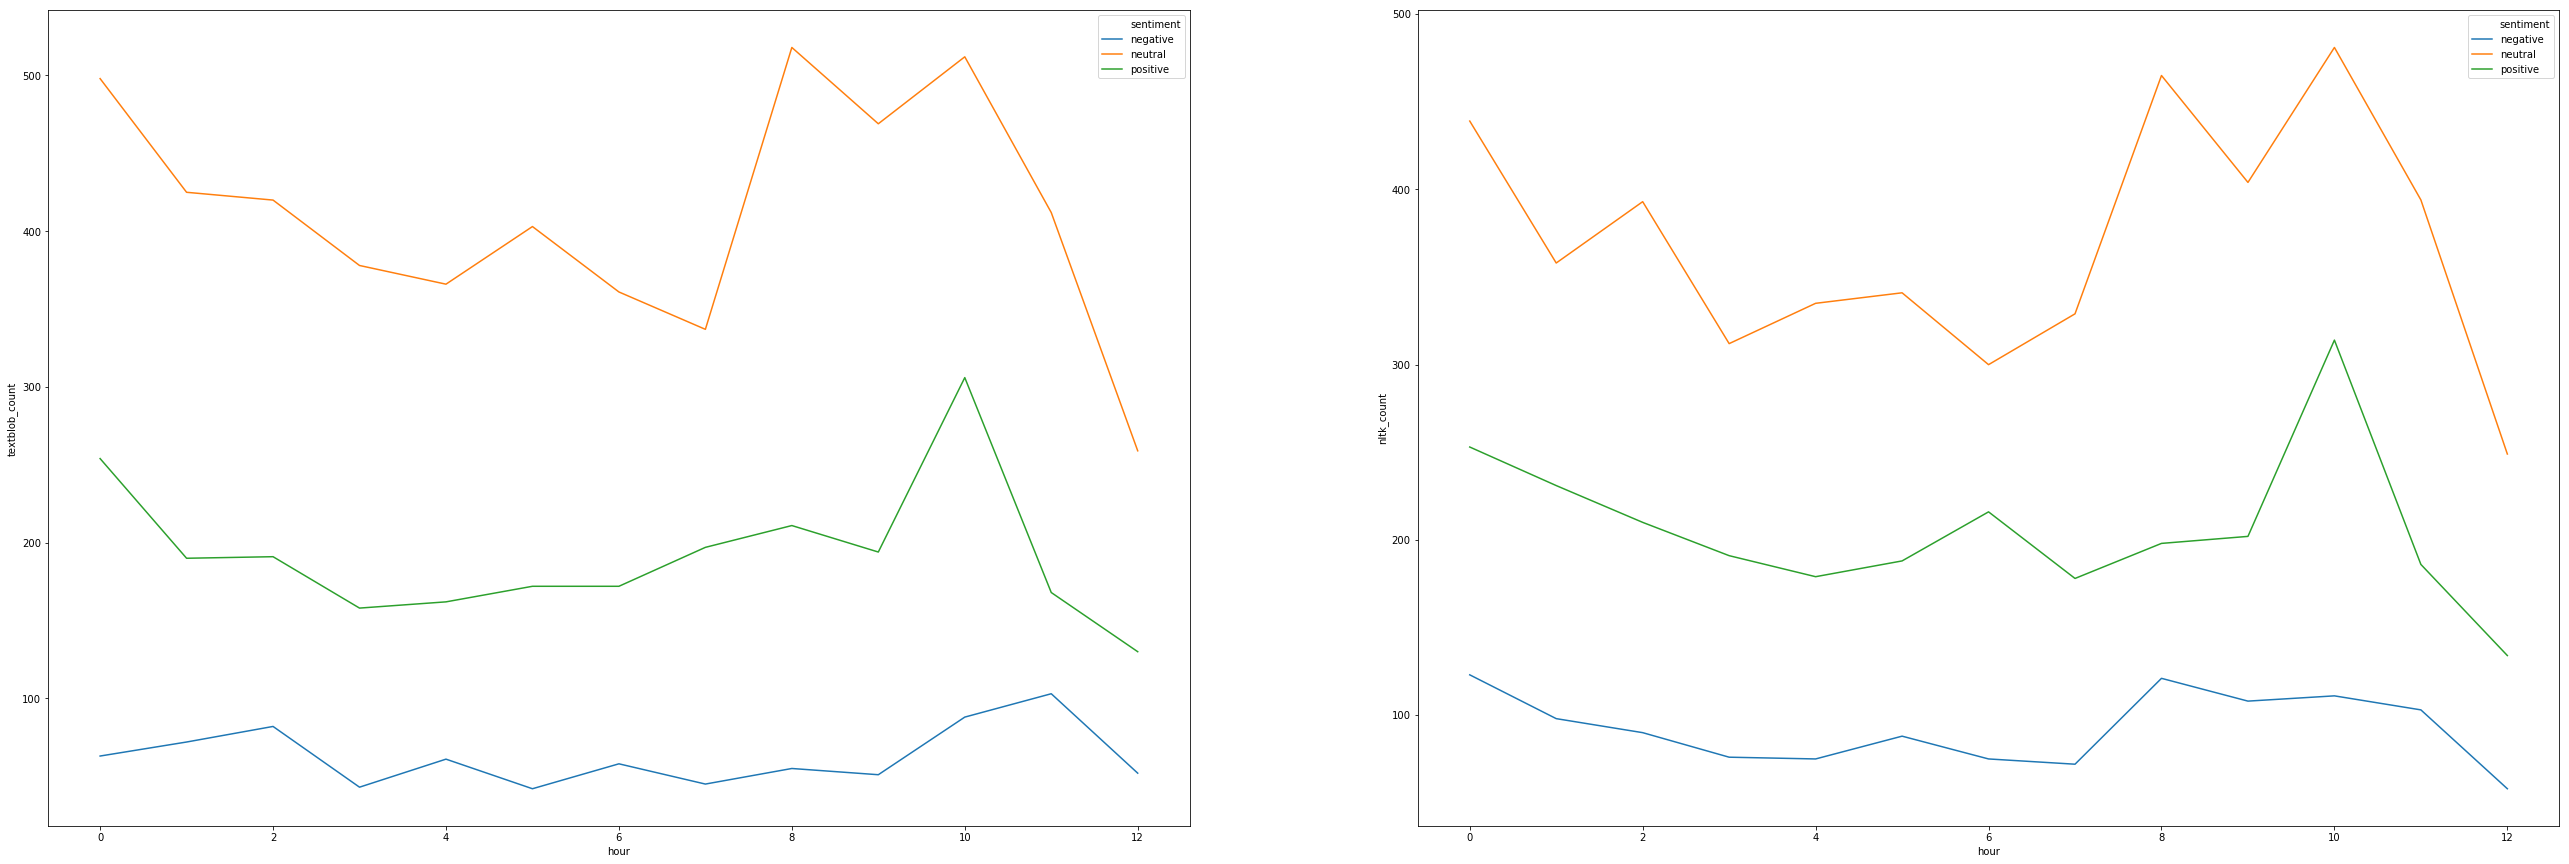

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(45,15))
sns.lineplot(x="hour", y="textblob_count", hue="sentiment", data=pnn_counts, ax=ax[0])
sns.lineplot(x="hour", y="nltk_count", hue="sentiment", data=pnn_counts, ax=ax[1])
#plt.legend(loc="upper left")